___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [4]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [65]:
BAC = yf.download("BAC", start=start, end=end)
C = yf.download("C", start=start, end=end)
GS = yf.download("GS", start=start, end=end)
JPM = yf.download("JPM", start=start, end=end)
MS = yf.download("MS", start=start, end=end)
WFC = yf.download("WFC", start=start, end=end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Fetch data for all tickers
df = yf.download(tickers, start=start, end=end, group_by="ticker")

[*********************100%***********************]  6 of 6 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [14]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info', 'Extra Info']


** Check the head of the bank_stocks dataframe.**

In [15]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Extra Info         BAC        BAC        BAC        BAC       BAC           C   
Date                                                                            
2006-01-03   31.370396  31.437027  30.750717  31.263782  16296700  326.256775   
2006-01-04   31.037254  31.477026  30.950632  31.317108  17757900  320.233398   
2006-01-05   31.077246  31.203848  30.864023  31.037268  14970700  321.822083   
2006-01-06   31.030579  31.257128  30.883987  31.183832  12599800  321.822083   
2006-01-09   31.050571  31.297112  30.890656  31.130532  15619400  320.299652   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Extra Info            C           C           C        C  ...         MS   
Date                                                      ...              
2006-01-03   326.852492  318.446213  324.337232  1537600  ...  32.405109   
2006-01-04   324.999179  320.034833  323.410592  1870960  ...  32.427338   
2006-01-05   322.881127  320.365866  320.630627  1143160  ...  32.516266   
2006-01-06   323.675431  319.042040  323.543040  1370210  ...  32.549583   
2006-01-09   322.616347  319.703935  321.689673  1680740  ...  32.894154   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Extra Info          MS         MS         MS       MS        WFC        WFC   
Date                                                                          
2006-01-03   32.505142  31.532600  31.771566  5377000  18.870823  18.915190   
2006-01-04   32.944175  32.427338  32.621847  7977800  18.651949  18.823501   
2006-01-05   32.560726  32.243955  32.538496  5778000  18.631239  18.666732   
2006-01-06   32.705189  32.260599  32.660731  6889800  18.740675  18.796873   
2006-01-09   32.949729  32.577383  32.582941  4144500  18.737715  18.826450   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Extra Info         WFC        WFC       WFC  
Date                                         
2006-01-03   18.453772  18.693355  11016400  
2006-01-04   18.554341  18.811670  10870000  
2006-01-05   18.521799  18.634196  10158000  
2006-01-06   18.566164  18.681519   8403800  
2006-01-09   18.666728  18.737715   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [16]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

,,0
Bank Ticker,Extra Info,
BAC,BAC,37.937492
C,C,388.967743
GS,GS,186.998840
JPM,JPM,53.933910
MS,MS,50.798607
WFC,WFC,44.486649


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [18]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001502,0.000000,0.014168,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016241,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

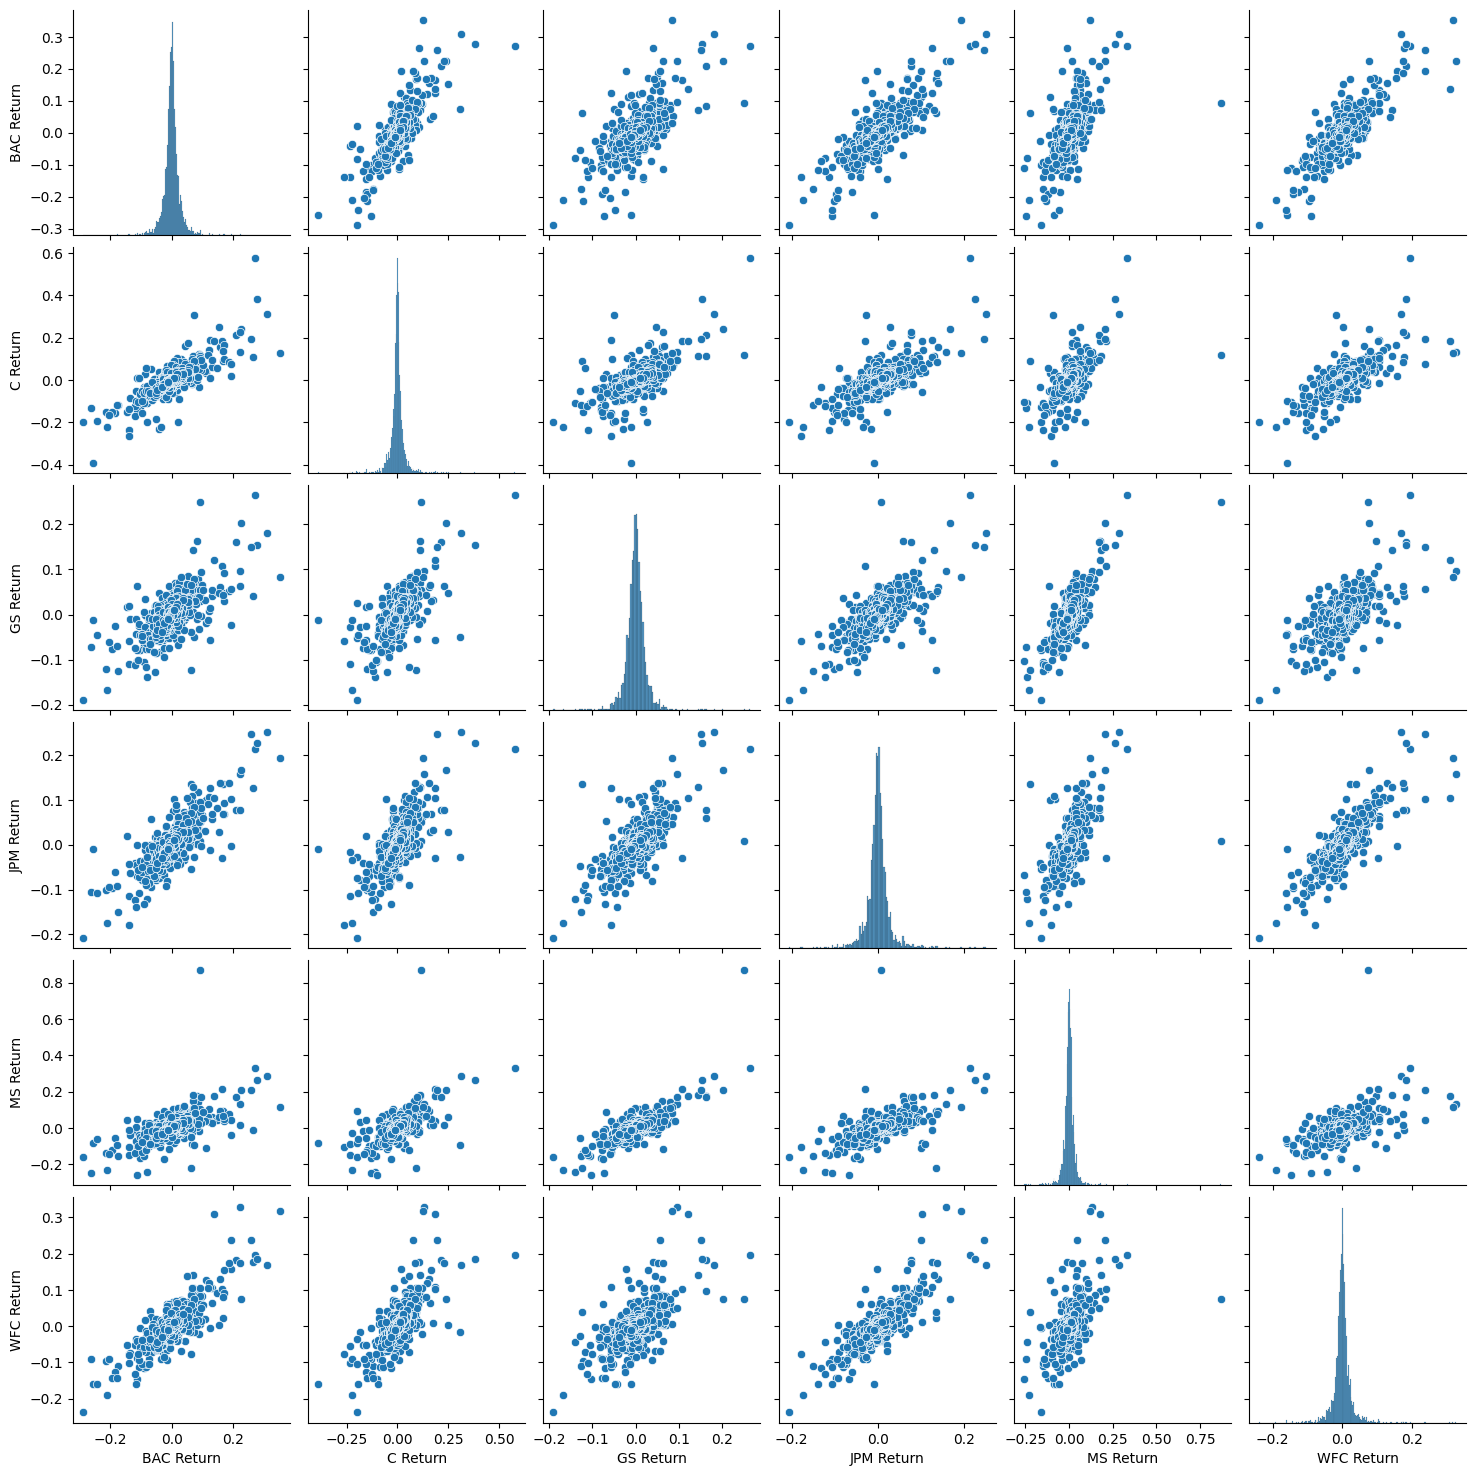

In [19]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [20]:
returns.idxmin()

,0
BAC Return,2009-01-20
C Return,2009-02-27
GS Return,2009-01-20
JPM Return,2009-01-20
MS Return,2008-10-09
WFC Return,2009-01-20


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [21]:
returns.idxmax()

,0
BAC Return,2009-04-09
C Return,2008-11-24
GS Return,2008-11-24
JPM Return,2009-01-21
MS Return,2008-10-13
WFC Return,2008-07-16


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [22]:
returns.std()

,0
BAC Return,0.036659
C Return,0.038672
GS Return,0.025386
JPM Return,0.027675
MS Return,0.037717
WFC Return,0.030195


In [25]:
returns.loc['2015-01-01':'2015-12-31'].std()

,0
BAC Return,0.016174
C Return,0.015288
GS Return,0.014043
JPM Return,0.014006
MS Return,0.016287
WFC Return,0.012552


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<ipython-input-27-955fab27aa19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


<Axes: xlabel='MS Return', ylabel='Density'>

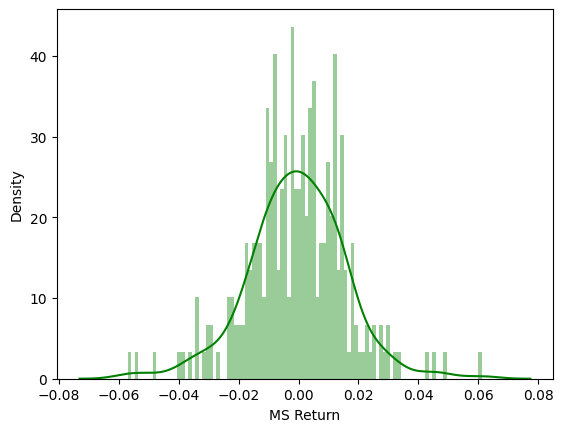

In [27]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<ipython-input-29-578cec4b5c47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


<Axes: xlabel='C Return', ylabel='Density'>

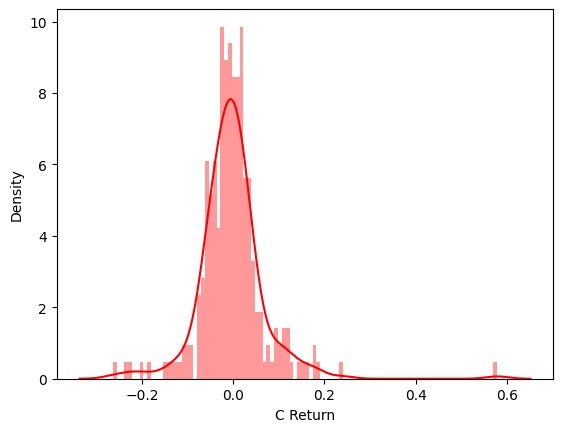

In [29]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

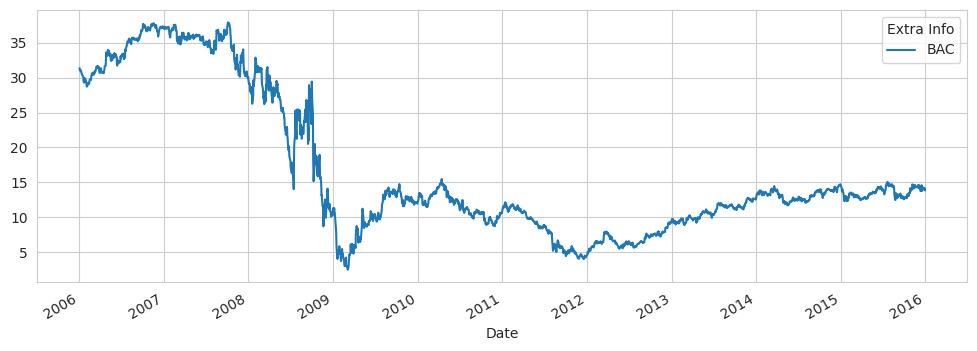

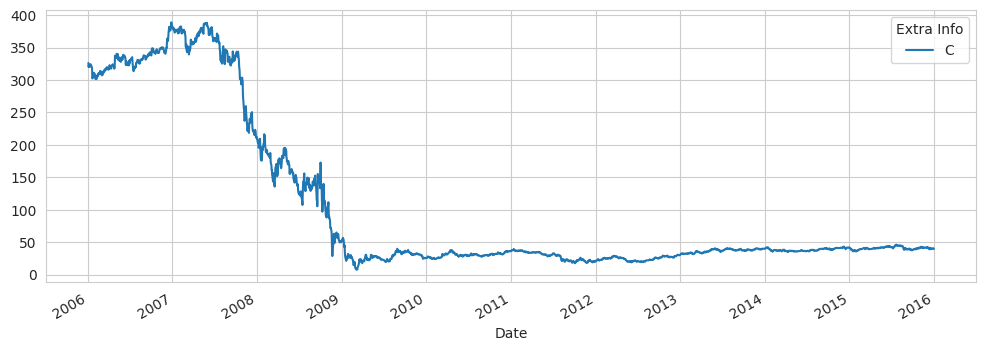

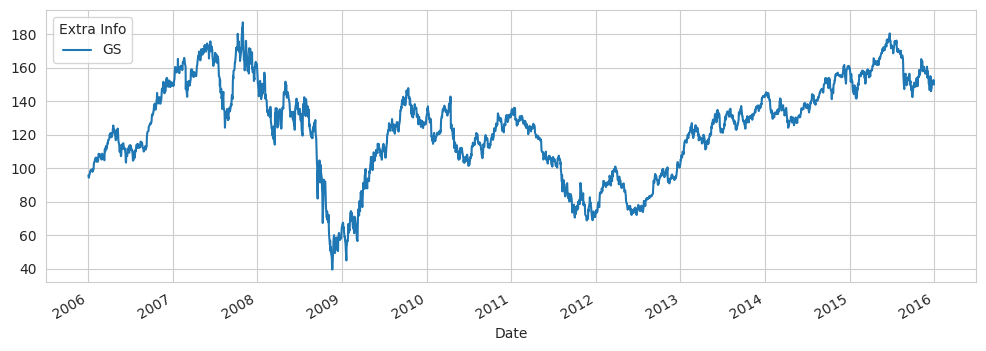

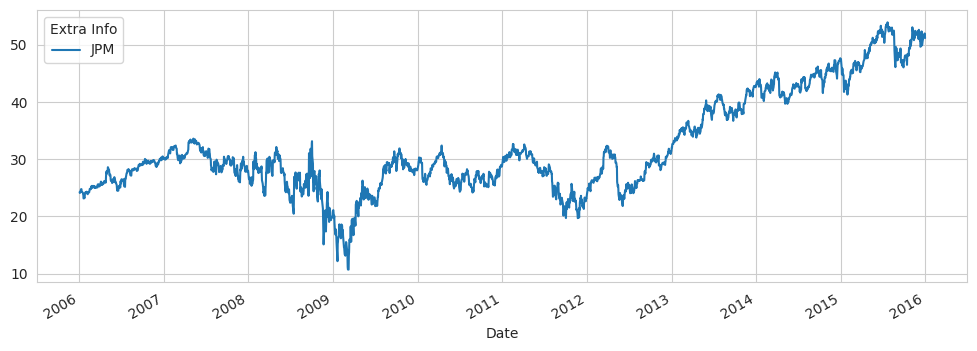

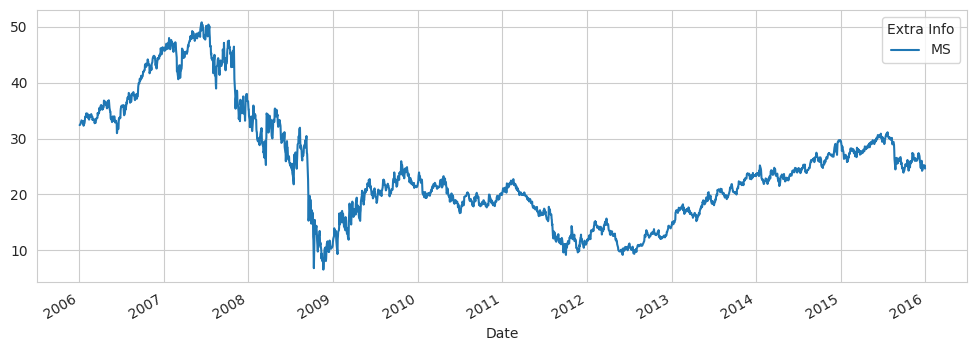

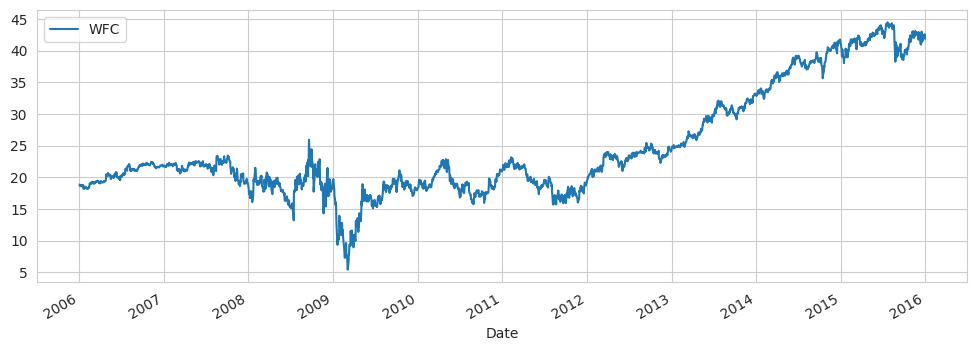

In [31]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

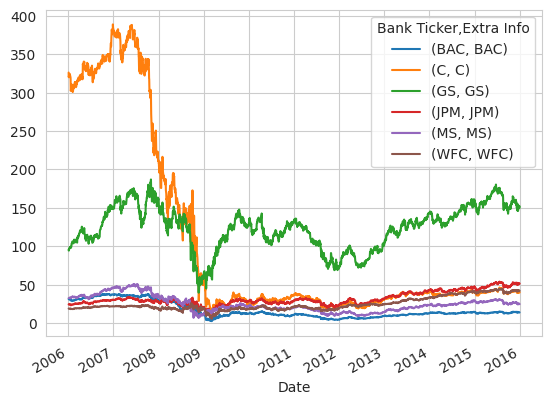

In [32]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [33]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Figure size 1200x600 with 0 Axes>

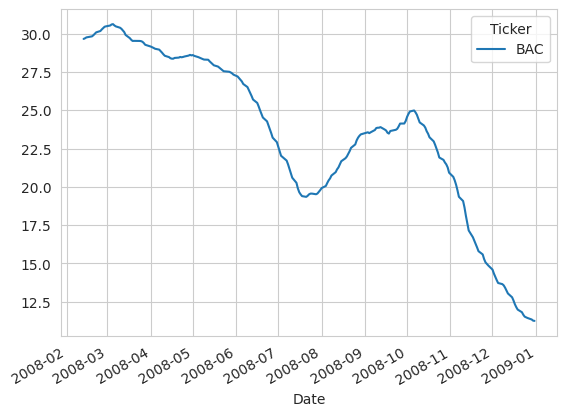

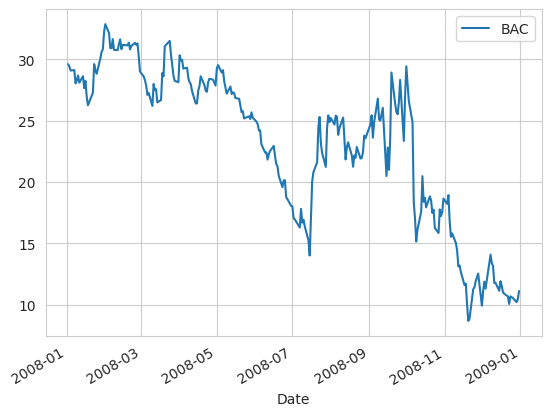

In [35]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker-Extra Info', ylabel='Bank Ticker-Extra Info'>

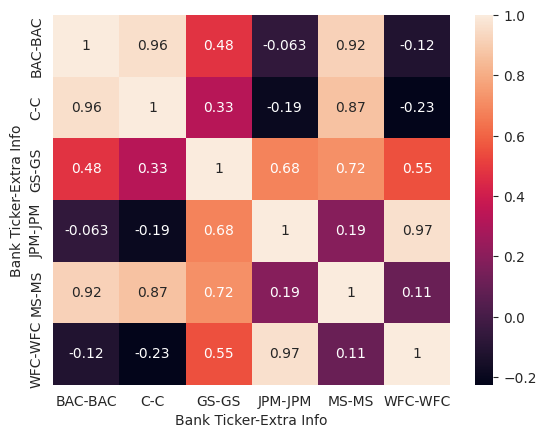

In [36]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

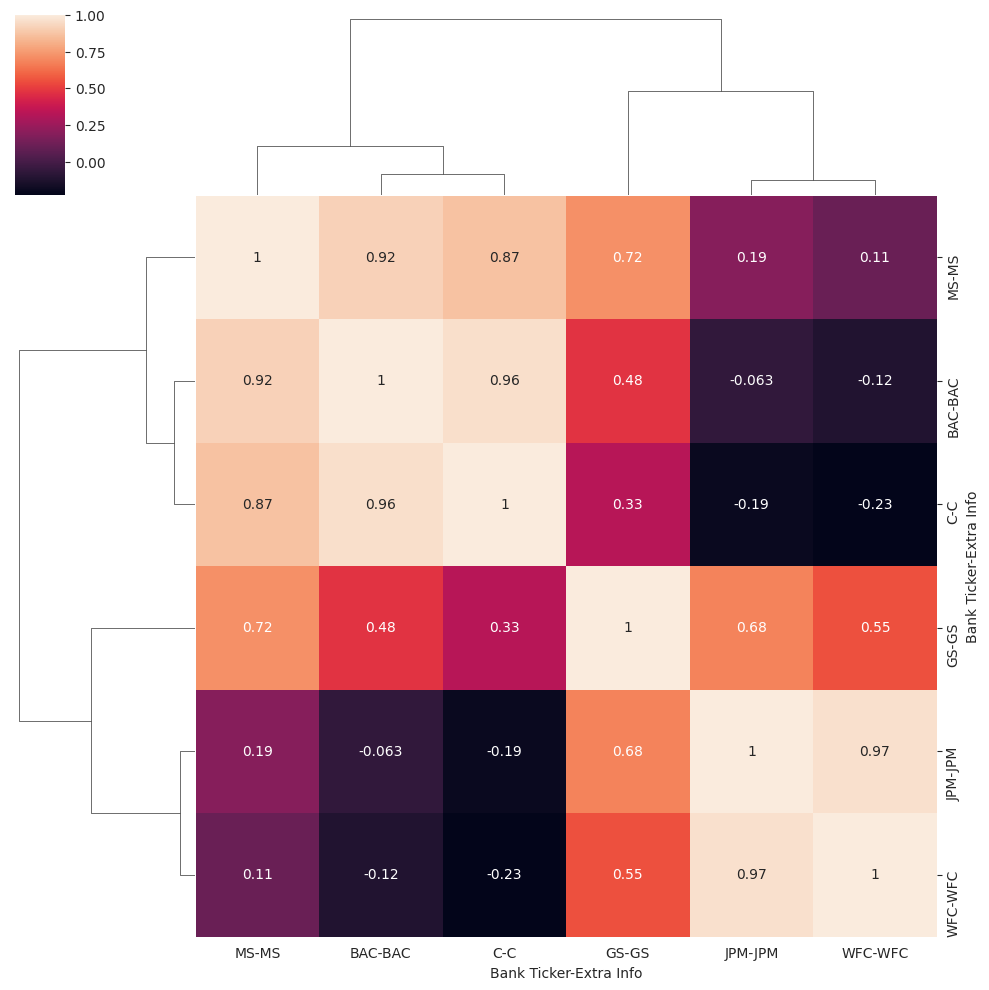

In [37]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [38]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [74]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(
    x=BAC.loc['2015-01-01':'2016-01-01'].index,
    open=BAC.loc['2015-01-01':'2016-01-01']['Open'],
    high=BAC.loc['2015-01-01':'2016-01-01']['High'],
    low=BAC.loc['2015-01-01':'2016-01-01']['Low'],
    close=BAC.loc['2015-01-01':'2016-01-01']['Close']
)])

fig.show()


** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [46]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [53]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/usr/local/lib/python3.10/dist-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.